2


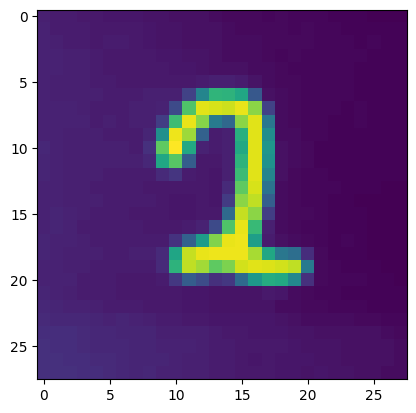

In [2]:
# Test model locally on NPU

import openvino as ov
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import PIL.ImageOps

from cnn_structure import DigitRecognitionModel


# Show whole tensors
torch.set_printoptions(threshold=10_000)

# Compile model
core = ov.Core()
core.available_devices
model = core.compile_model("trained_model.onnx", "NPU")

# Load the grayscale image and invert colors
grayscale = Image.open("testing_data/2.jpg").convert('L') 
inverted_img = PIL.ImageOps.invert(grayscale)

# Define the transform to resize the image and convert to tensor
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to 28x28
    transforms.ToTensor(),        # Convert to tensor and scale to [0, 1]
])

# Apply the transform
img_tensor = transform(inverted_img).view(1,1,28,28)

# Predict digit
with torch.no_grad():
    prediction = model(img_tensor.view(1,1,28,28))

print(prediction[0][0].argmax())
plt.imshow(img_tensor.reshape(28,28))
